In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import sklearn

__Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?__

In [2]:
data = pd.read_csv('weatherHistory.csv')
data = data.copy()
data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


# __EDA__

In [86]:
data.shape

(96453, 12)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


summulation and percentages of missing values in each column

In [88]:
total =data.isnull().sum().sort_values(ascending = False)
percent =(data.isnull().sum()/len(data)).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Precip Type,517,0.00536
Formatted Date,0,0.00000
Summary,0,0.00000
Temperature (C),0,0.00000
Apparent Temperature (C),0,0.00000
Humidity,0,0.00000
Wind Speed (km/h),0,0.00000
Wind Bearing (degrees),0,0.00000
Visibility (km),0,0.00000
Loud Cover,0,0.00000


In [7]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [8]:
data.describe(include='O')

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


In [9]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

## finding common weather condition

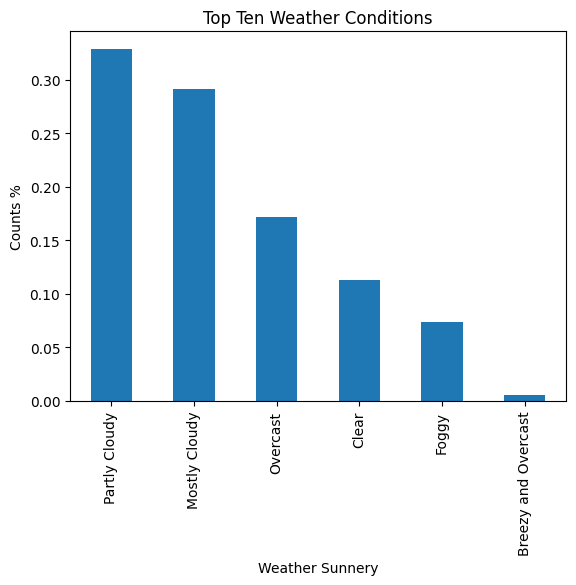

In [10]:
ax = (data['Summary'].value_counts(normalize = True)).head(6)\
.plot(kind = 'bar', title = 'Top Ten Weather Conditions' )
ax.set_xlabel("Weather Sunnery")
ax.set_ylabel('Counts %')

plt.show()

In [11]:
data['Summary'].value_counts().head(2).sum()/ len(data)

0.6202710128248992

Cloudy is the most common weather condition, as indicated by the table, with more than 60% of the days having it.

## let's take a look into Temoerature, Humidity, Wind Speed

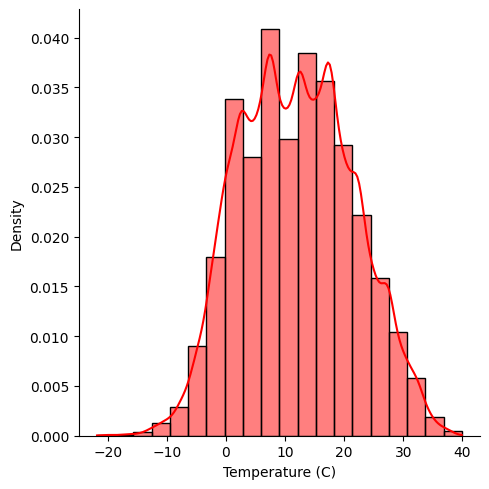

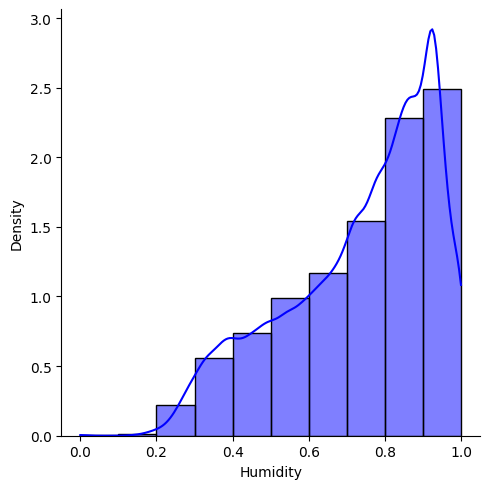

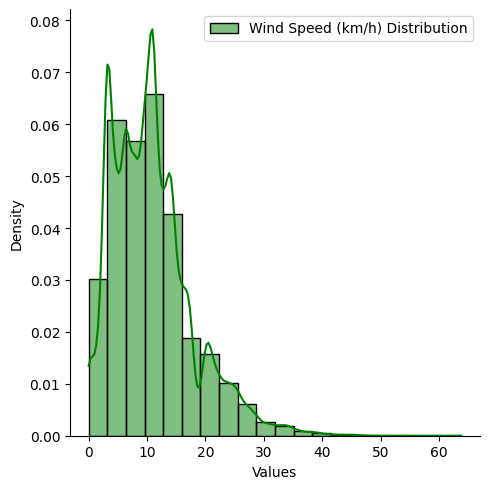

In [12]:

# Plotting the distribution using seaborn
sns.displot(data=data, x=data["Temperature (C)"], kde=True, color='r', label='Temperature (C) Distribution', bins = 20, stat="density")
sns.displot(data=data, x=data["Humidity"], kde=True, color='b', label='Humidity Distribution', bins = 10, stat="density" )
sns.displot(data=data, x=data["Wind Speed (km/h)"], kde=True, color='g', label='Wind Speed (km/h) Distribution', bins = 20, stat="density")
# Adding labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

In [13]:
data[data.Humidity > 0.8]['Humidity'].value_counts().sum()/data.shape[0]


0.4588867116626751

In [14]:
data[data['Wind Speed (km/h)'].between(5,15)]['Wind Speed (km/h)'].value_counts().sum()/data.shape[0]

0.5615066405399521

The only variable that followed a normal distribution was temperature, with most days having an average temperature between 5°C and 15°C. Humidity had a positively skewed distribution, indicating that the data was right-tailed and most of the values were concentrated on the left. The city was very humid, with more than 45% of days having humidity above 80%. Wind speed also had a skewed distribution, with more than 56% of days having wind speed between 5 km/h and 15 km/h

In [15]:
data.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [16]:
data.Summary.value_counts().head(5)

Summary
Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
Name: count, dtype: int64

 we separate the data based on 5 common unique values for  the Summary 

In [17]:
dist_data = data.loc[(data.Summary == 'Partly Cloudy') | (data.Summary == 'Mostly Cloudy') |\
(data.Summary == 'Overcast') | (data.Summary == 'Clear') | (data.Summary == 'Clear'),\
['Summary','Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']]
dist_data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


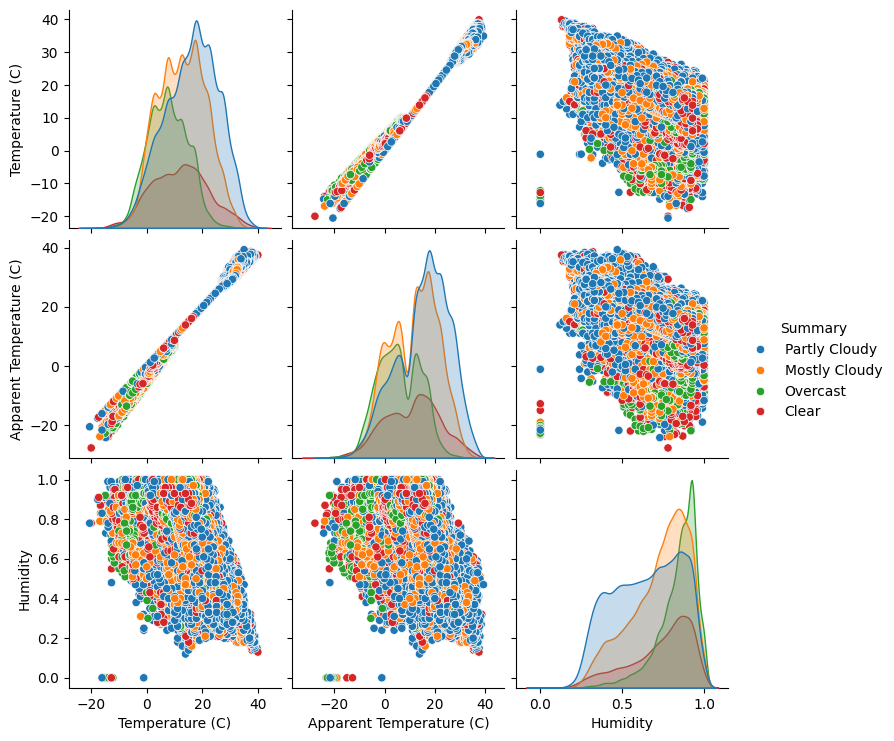

In [18]:
sns.pairplot(dist_data, vars = [ 'Temperature (C)', 
                          'Apparent Temperature (C)',
                          'Humidity' ],
                          hue = 'Summary')
plt.show()

In [19]:
grouped_data = data.groupby(by = 'Summary')[['Temperature (C)', 
                          'Apparent Temperature (C)',
                          'Humidity']]\
.agg(['max','min', 'mean'])\
.sort_values(by = 'Summary', axis =0,ascending=False )


In [20]:

# Count the occurrences of each unique value in 'Summary'
summary_counts = data['Summary'].value_counts()
summary_counts
# Sort the grouped data by the count of occurrences of each unique value in 'Summary'
grouped_data_sorted = grouped_data.loc[summary_counts.index]

# Print or use the sorted grouped data
grouped_data_sorted.head(7)



Temperature (C)                        \
                                     max        min       mean   
Summary                                                          
Partly Cloudy                  39.588889 -20.555556  16.024782   
Mostly Cloudy                  37.155556 -16.894444  12.629334   
Overcast                       33.644444 -16.111111   7.516502   
Clear                          39.905556 -20.000000  11.925109   
Foggy                          23.661111 -21.822222   1.464035   
Breezy and Overcast            22.433333 -11.533333   7.241614   
Breezy and Mostly Cloudy       27.522222  -6.966667  11.093411   

                         Apparent Temperature (C)                        \
                                              max        min       mean   
Summary                                                                   
Partly Cloudy                           39.344444 -24.233333  15.394033   
Mostly Cloudy                           38.116667 -23.872222  11.624994   
Overcast                                32.250000 -23.027778   5.789636   
Clear                                   38.661111 -27.716667  11.040338   
Foggy                                   23.661111 -26.227778  -0.210419   
Breezy and Overcast                     22.433333 -21.716667   3.492235   
Breezy and Mostly Cloudy                27.766667 -15.972222   8.680588   

                         Humidity                  
                              max   min      mean  
Summary                                            
Partly Cloudy                1.00  0.00  0.648571  
Mostly Cloudy                1.00  0.00  0.725069  
Overcast                     1.00  0.00  0.837232  
Clear                        1.00  0.00  0.729708  
Foggy                        1.00  0.00  0.950765  
Breezy and Overcast          1.00  0.15  0.763144  
Breezy and Mostly Cloudy     0.93  0.15  0.637054

In [21]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:

data['Apparent Temperature (C)'].value_counts().sort_index(ascending = False)

Apparent Temperature (C)
 39.344444    1
 38.661111    1
 38.416667    1
 38.377778    1
 38.255556    1
             ..
-25.072222    1
-25.200000    1
-25.922222    1
-26.227778    1
-27.716667    1
Name: count, Length: 8984, dtype: int64

In [4]:
bins = np.linspace(min(data['Apparent Temperature (C)']), max(data['Apparent Temperature (C)']), 7 )
bins

array([-27.71666667, -16.53981481,  -5.36296296,   5.81388889,
        16.99074074,  28.16759259,  39.34444444])

In [5]:

group_names = ['Frizzing', 'Partialy_Cold', 'Cool', 'Moderate', 'Partialy_Warm', 'Hot' ]
data['Apparent Temperature Bins'] = pd.cut(data['Apparent Temperature (C)'], bins, labels = group_names,  include_lowest = True )


<Axes: xlabel='Apparent Temperature Bins', ylabel='percent'>

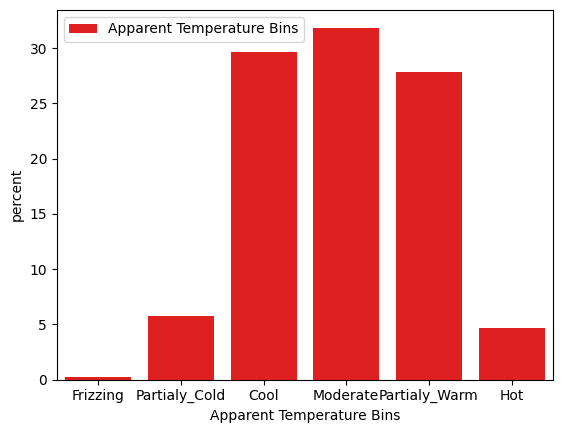

In [6]:
sns.countplot(data=data, x=data["Apparent Temperature Bins"],  color='r', label='Apparent Temperature Bins', stat = 'percent')


<Axes: xlabel='Apparent Temperature Bins', ylabel='Humidity'>

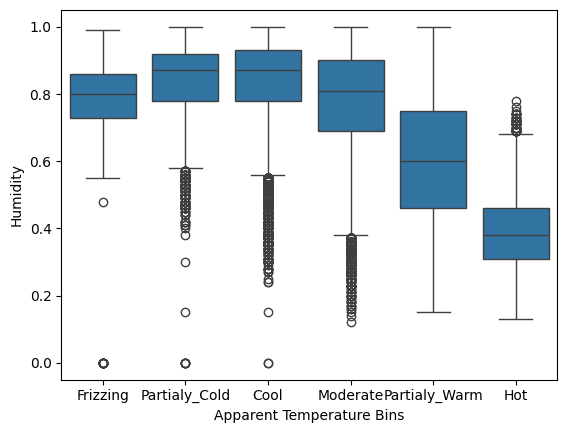

In [7]:
sns.boxplot(data= data, x = 'Apparent Temperature Bins', y = 'Humidity' )

In [8]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Apparent Temperature Bins
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,Moderate
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,Moderate
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,Moderate
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,Moderate
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,Moderate


__Task = find 'Apparent Temperature (C)', 'Humidity', based on Apparent Temperature Bins and Summary__

In [9]:
data.Summary.value_counts().head().to_frame()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148


In [10]:

# Select the columns of interest
data_test = data[['Summary', 'Apparent Temperature (C)', 'Humidity', 'Apparent Temperature Bins']]

# Find the 5 most repeated values in 'Summary'
top_5_summary = data_test['Summary'].value_counts().head(5).index.tolist()

# Filter the data based on the top 5 summary values
data_test = data_test[data_test['Summary'].isin(top_5_summary)]

# Group the data by 'Apparent Temperature Bins' and 'Summary' then calculate the mean for 'Apparent Temperature (C)' and 'Humidity'
data_gr = data_test.groupby(by = ['Apparent Temperature Bins', 'Summary'], observed=True)[['Apparent Temperature (C)', 'Humidity']].mean()
data_gr

Apparent Temperature (C)  Humidity
Apparent Temperature Bins Summary                                          
Frizzing                  Clear                        -18.895411  0.750217
                          Foggy                        -19.682900  0.790390
                          Mostly Cloudy                -18.370238  0.712143
                          Overcast                     -19.246091  0.651481
                          Partly Cloudy                -18.953763  0.781290
Partialy_Cold             Clear                         -9.126155  0.801515
                          Foggy                         -8.343632  0.933848
                          Mostly Cloudy                 -8.363065  0.794304
                          Overcast                      -8.126218  0.844467
                          Partly Cloudy                 -8.410898  0.805958
Cool                      Clear                          0.687727  0.813723
                          Foggy                         -0.084671  0.957132
                          Mostly Cloudy                  0.906695  0.817171
                          Overcast                       0.656013  0.861110
                          Partly Cloudy                  0.984878  0.787263
Moderate                  Clear                         11.942589  0.779618
                          Foggy                          9.504273  0.957454
                          Mostly Cloudy                 11.911086  0.765701
                          Overcast                      11.378564  0.835812
                          Partly Cloudy                 12.203143  0.737772
Partialy_Warm             Clear                         21.339890  0.641343
                          Foggy                         18.062153  0.925625
                          Mostly Cloudy                 21.189392  0.619064
                          Overcast                      19.349994  0.752181
                          Partly Cloudy                 21.994603  0.571196
Hot                       Clear                         31.450394  0.371034
                          Mostly Cloudy                 30.177027  0.418149
                          Overcast                      29.916066  0.432432
                          Partly Cloudy                 31.139085  0.396797

In [17]:
data_test = data[['Summary', 'Apparent Temperature (C)', 'Humidity', 'Apparent Temperature Bins']]

# Find the 5 most repeated values in 'Summary'
top_5_summary = data_test['Summary'].value_counts().head(5).index.tolist()

# Filter the data based on the top 5 summary values
data_test = data_test[data_test['Summary'].isin(top_5_summary)]
data_ = data_test.drop('Humidity', axis = 1)
data_

,Summary,Apparent Temperature (C),Apparent Temperature Bins
0,Partly Cloudy,7.388889,Moderate
1,Partly Cloudy,7.227778,Moderate
2,Mostly Cloudy,9.377778,Moderate
3,Partly Cloudy,5.944444,Moderate
4,Mostly Cloudy,6.977778,Moderate
...,...,...,...
96448,Partly Cloudy,26.016667,Partialy_Warm
96449,Partly Cloudy,24.583333,Partialy_Warm
96450,Partly Cloudy,22.038889,Partialy_Warm
96451,Partly Cloudy,21.522222,Partialy_Warm


In [22]:
pivot = data_.pivot_table(values="Apparent Temperature (C)", index="Summary", columns="Apparent Temperature Bins", aggfunc="mean")

In [24]:
pivot

Apparent Temperature Bins,Frizzing,Partialy_Cold,Cool,Moderate,Partialy_Warm,Hot
Summary,,,,,,
Clear,-18.895411,-9.126155,0.687727,11.942589,21.339890,31.450394
Foggy,-19.682900,-8.343632,-0.084671,9.504273,18.062153,NaN
Mostly Cloudy,-18.370238,-8.363065,0.906695,11.911086,21.189392,30.177027
Overcast,-19.246091,-8.126218,0.656013,11.378564,19.349994,29.916066
Partly Cloudy,-18.953763,-8.410898,0.984878,12.203143,21.994603,31.139085


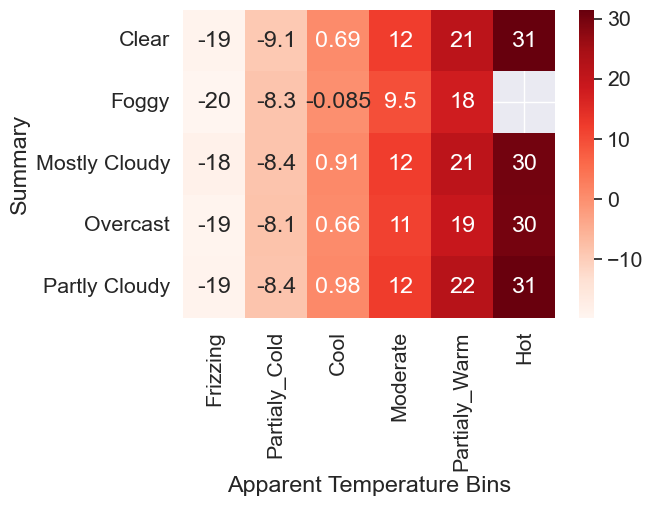

In [26]:
plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(pivot, annot=True , cmap = "Reds")
plt.show()

In [28]:
from scipy.stats import pearsonr
data_cor = data[[ 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]


In [34]:
# Create an empty DataFrame to store correlation results
correlation_results = pd.DataFrame(index=data_cor.columns, columns=data_cor.columns)

# Calculate Pearson correlation coefficient and p-value for each pair of columns
for col1 in data_cor.columns:
    for col2 in data_cor.columns:
        pearson_coef, p_value = pearsonr(data_cor[col1], data_cor[col2])
        correlation_results.loc[col1, col2] = f"{pearson_coef:.4f} (p-value: {p_value:.4f})"
correlation_results
# # Display the correlation results
# print("Pearson Correlation Coefficients and p-values:")
# print(correlation_results)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.0000 (p-value: 0.0000),0.9926 (p-value: 0.0000),-0.6323 (p-value: 0.0000),0.0090 (p-value: 0.0054),0.0300 (p-value: 0.0000),0.3928 (p-value: 0.0000),-0.0054 (p-value: 0.0907)
Apparent Temperature (C),0.9926 (p-value: 0.0000),1.0000 (p-value: 0.0000),-0.6026 (p-value: 0.0000),-0.0566 (p-value: 0.0000),0.0290 (p-value: 0.0000),0.3817 (p-value: 0.0000),-0.0002 (p-value: 0.9458)
Humidity,-0.6323 (p-value: 0.0000),-0.6026 (p-value: 0.0000),1.0000 (p-value: 0.0000),-0.2250 (p-value: 0.0000),0.0007 (p-value: 0.8195),-0.3692 (p-value: 0.0000),0.0055 (p-value: 0.0903)
Wind Speed (km/h),0.0090 (p-value: 0.0054),-0.0566 (p-value: 0.0000),-0.2250 (p-value: 0.0000),1.0000 (p-value: 0.0000),0.1038 (p-value: 0.0000),0.1007 (p-value: 0.0000),-0.0493 (p-value: 0.0000)
Wind Bearing (degrees),0.0300 (p-value: 0.0000),0.0290 (p-value: 0.0000),0.0007 (p-value: 0.8195),0.1038 (p-value: 0.0000),1.0000 (p-value: 0.0000),0.0476 (p-value: 0.0000),-0.0117 (p-value: 0.0003)
Visibility (km),0.3928 (p-value: 0.0000),0.3817 (p-value: 0.0000),-0.3692 (p-value: 0.0000),0.1007 (p-value: 0.0000),0.0476 (p-value: 0.0000),1.0000 (p-value: 0.0000),0.0598 (p-value: 0.0000)
Pressure (millibars),-0.0054 (p-value: 0.0907),-0.0002 (p-value: 0.9458),0.0055 (p-value: 0.0903),-0.0493 (p-value: 0.0000),-0.0117 (p-value: 0.0003),0.0598 (p-value: 0.0000),1.0000 (p-value: 0.0000)


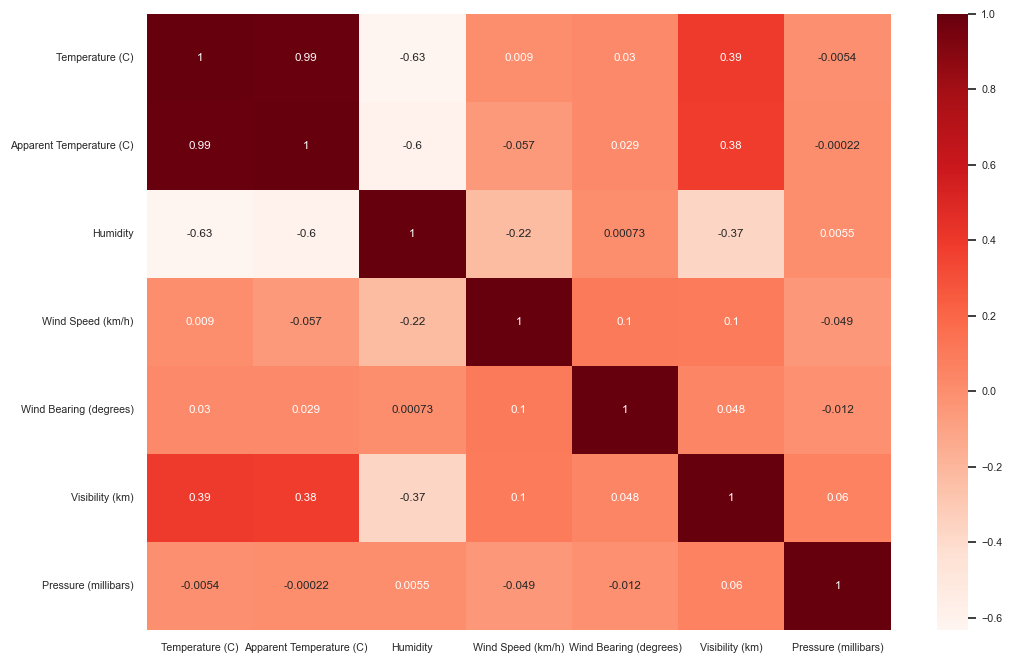

In [36]:
plt.figure(figsize=(12,8))
sns.set(font_scale=0.7)
sns.heatmap(data_cor.corr(numeric_only = True), annot= True, cmap = "Reds")
plt.show()

In [42]:
# crosstab is a table showing the relationship between to or more variables
# contingenct table: a crosstab shows relationship between two categorical variables
count_table = pd.crosstab(data_test['Apparent Temperature Bins'], data_test['Summary'], margins=True, margins_name='Total')
count_table

Summary,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,Total
Apparent Temperature Bins,,,,,,
Frizzing,46,77,14,54,31,222
Partialy_Cold,726,1354,927,1453,913,5373
Cool,2874,4530,7734,7223,5507,27868
Moderate,3766,1139,9758,6074,9415,30152
Partialy_Warm,2830,48,8921,1756,12864,26419
Hot,648,0,740,37,3003,4428
Total,10890,7148,28094,16597,31733,94462


Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

__we want to predict the apparent temperature given the humidity__

In [57]:
x = data[['Humidity']]
y = data['Apparent Temperature (C)']


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=10)

In [59]:
reg = LinearRegression()
reg.fit(x_test,y_test)

LinearRegression()

predict the apparent temperature give the humedity

In [60]:
Y_hat = reg.predict(x_test)

calculate the accuracy of the model

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test)) 
LinearRegression_MSE = mean_squared_error(y_test,Y_hat)
LinearRegression_R2 = r2_score(y_test,Y_hat)

In [62]:
Report = pd.DataFrame(data = {'MAE':[LinearRegression_MAE], 
                             'MSE': [LinearRegression_MSE],
                             'R2': [LinearRegression_R2]}
    
)
Report

,MAE,MSE,R2
0,6.910336,71.939992,0.361188


Let's predict apparent temperature give the temperature

In [69]:
x = data[['Temperature (C)']]
y = data['Apparent Temperature (C)']


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=10)

In [71]:
reg = LinearRegression()
reg.fit(x_test,y_test)

LinearRegression()

In [72]:
Predictions = reg.predict(x_test)

In [73]:
LinearRegression_MAE = np.mean(np.absolute(Predictions - y_test)) 
LinearRegression_MSE = mean_squared_error(y_test,Predictions)
LinearRegression_R2 = r2_score(y_test,Predictions)

In [74]:
Report = pd.DataFrame(data = {'MAE':[LinearRegression_MAE], 
                             'MSE': [LinearRegression_MSE],
                             'R2': [LinearRegression_R2]}
    
)
Report

,MAE,MSE,R2
0,0.985087,1.670165,0.985169


In [75]:
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [1.11121646]
Intercept:  -2.394739427124687


In [77]:
# Retrieve the coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_
# Display the equation formula
equation_formula = f'y = {intercept:.4f} '
for i, coef in enumerate(coefficients):
    equation_formula += f'+ ({coef:.4f} * X{i})'

print("Equation Formula:")
print(equation_formula)

Equation Formula:
y = -2.3947 + (1.1112 * X0)


## d

In [10]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])

In [11]:
numeric_df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


before
9 9
9 41
9 12
3 3
3 74
3 15
After 3


True